In [1]:
from statsmodels.tsa.arima.model import ARIMA

import torch
import src
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
use_cuda = torch.cuda.is_available()
if use_cuda:
    print('__CUDNN VERSION:', torch.backends.cudnn.version())
    print('__Number CUDA Devices:', torch.cuda.device_count())
    print('__CUDA Device Name:',torch.cuda.get_device_name(0))
    print('__CUDA Device Total Memory [GB]:',torch.cuda.get_device_properties(0).total_memory/1e9)
device = torch.device("cuda" if use_cuda else "cpu")
print("Device: ", device)

__CUDNN VERSION: 7605
__Number CUDA Devices: 1
__CUDA Device Name: GeForce GTX 1060
__CUDA Device Total Memory [GB]: 6.373572608
Device:  cuda


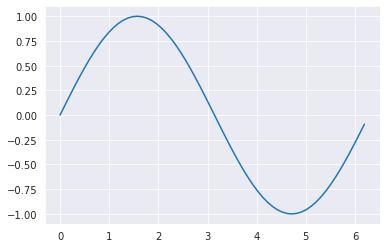

In [3]:
t = np.linspace(0, 32*np.pi, 1024)
x = np.sin(t)
plt.plot(t[:64], x[:64]);

In [4]:
from src.utils import data

window = 64
params = {
    'batch_size': 10,
    'shuffle': False#True
}
train_loader = data.create_data_loader(
    x=torch.tensor(x),
    window=window,
    model_type="LSTM",
    device=device,
    anomalies=torch.zeros(len(x)),
    **params
)

In [35]:
order = (5, 0, 0)
model = ARIMA(x, order=order)
fit = model.fit()

/home/stachu/anaconda3/envs/dl/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


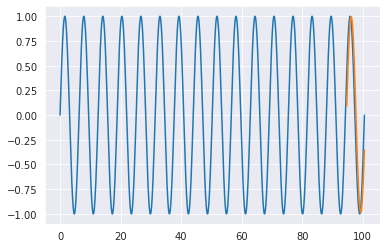

In [36]:
pred = fit.forecast(64)
t = np.linspace(0, 32*np.pi, 1024 + 64)
x = np.sin(t)
plt.plot(t, x);
plt.plot(t[1024:], pred);

In [37]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1088
Model:                 ARIMA(5, 0, 0)   Log Likelihood                7295.204
Date:                Sat, 08 May 2021   AIC                         -14576.407
Time:                        22:15:29   BIC                         -14541.462
Sample:                             0   HQIC                        -14563.180
                               - 1088                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.001     -0.300      0.764      -0.002       0.002
ar.L1          1.3763   2.16e-05   6.39e+04      0.000       1.376       1.376
ar.L2         -0.3486   1.52e-05   -2.3e+04      0.000      -0.349      -0.349
ar.L3         -0.4034   1.05e-05  -3.82e+04      0.000      -0.403      -0.403
ar.L4          1.2783   1.02e-05   1.25e+05      0.000       1.278       1.278
ar.L5         -0.9292   1.45e-05  -6.39e+04      0.000      -0.929      -0.929
sigma2      8.741e-08   3.74e-09     23.395      0.000    8.01e-08    9.47e-08
===================================================================================
Ljung-Box (L1) (Q):                  83.33   Jarque-Bera (JB):          27192065.73
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                            25.71
Prob(H) (two-sided):                  0.00   Kurtosis:                       775.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.61e+19. Standard errors may be unstable.
"""